In [1]:
import scanpy 
import numpy as np
import pandas as pd

from anndata import AnnData
import seaborn as sns


[data](https://singlecell.broadinstitute.org/single_cell/study/SCP1038/the-human-and-mouse-enteric-nervous-system-at-single-cell-resolution?label=PEMN_1&cluster=hli.tsne2.txt&spatialGroups=--&annotation=LABEL--group--cluster&subsample=100000#study-download)

In [2]:
ls data

 Volume in drive D is Data
 Volume Serial Number is 3269-0E65

 Directory of d:\KU\RGS\data

09/26/2025  09:02 AM    <DIR>          .
09/26/2025  02:13 PM    <DIR>          ..
09/25/2025  08:48 PM        64,624,457 AtlasFullLength_log2TPM.txt.gz
09/25/2025  08:59 PM     1,826,051,007 gene_sorted-msi.matrix.mtx
09/25/2025  08:58 PM        12,103,748 gene_sorted-msi.neur.matrix.mtx
09/25/2025  09:00 PM       110,089,776 regional_cell_sampling_Log2TPM_fixed.txt.gz
09/25/2025  09:00 PM        22,361,169 regional_sampling_UMIcounts.txt.gz
               5 File(s)  2,035,230,157 bytes
               2 Dir(s)  77,555,281,920 bytes free


# convert to h5ad

In [3]:
# gene_sorted-msi.matrix.mtx	Mouse ileum all cells (10X) data 
gc_all = scanpy.read_mtx("data/gene_sorted-msi.matrix.mtx")

In [5]:
genes_all = pd.read_csv("data/msi.genes.tsv", sep=';', header=None)
bc_all = pd.read_csv("data/msi.barcodes.tsv", sep=';',  header=None)

In [8]:
gc_all = gc_all.T
gc_all.obs = bc_all
gc_all.var = genes_all
gc_neur = scanpy.read_mtx("data/gene_sorted-msi.neur.matrix.mtx")

bc_neur = pd.read_csv("data/msi.neur.barcodes.tsv", sep=';',  header=None)
genes_neur = pd.read_csv("data/msi.neur.genes.tsv", sep=';',  header=None)
gc_neur = gc_neur.T
gc_neur.obs = bc_neur
gc_neur.var = genes_neur

C:\Users\Zhenia\anaconda3\Lib\functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
C:\Users\Zhenia\anaconda3\Lib\functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
C:\Users\Zhenia\anaconda3\Lib\functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
C:\Users\Zhenia\anaconda3\Lib\functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


In [14]:
meta = pd.read_csv("data/all.meta.txt", sep='\t')

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_12804\4005217905.py:1: DtypeWarning: Columns (1,4,5,7,9,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("data/all.meta.txt", sep='\t')


In [15]:
meta['Dataset'].value_counts()  

Dataset
Mouse colon all cells (10X)                 343000
Human colon all cells (10X)                 146442
Mouse ileum all cells (10X)                  79293
Human colon enteric glia (10X)                6054
Mouse colon enteric glia (Smart-Seq2)         3039
Mouse colon enteric neurons (Smart-Seq2)      2657
Mouse colon enteric neurons (10X)             1938
Mouse colon enteric glia (10X)                1690
Human colon enteric neurons (10X)             1445
Mouse ileum enteric neurons (10X)              473
Mouse ileum enteric glia (10X)                 429
group                                            1
Name: count, dtype: int64

In [16]:
meta = pd.read_csv("data/all.meta.txt", sep='\t')
meta[meta['Dataset'] == "Mouse ileum enteric neurons (10X)"]

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_12804\67444450.py:1: DtypeWarning: Columns (1,4,5,7,9,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("data/all.meta.txt", sep='\t')


,NAME,Age,Annotation,Dataset,Location_ID,Mouse_ID,Overload,Patient_ID,Region,Segment,Sex,Time,Type,Unique_ID,nGene,nUMI
570181,M1_S3.GACCAATGTTCTCTAT,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M1,2x,NaN,ileum,NaN,F,NaN,NaN,S3,2027,3977.0
570182,M1_S4.ACGATCAAGTGGAAAG,NaN,PSN_1,Mouse ileum enteric neurons (10X),NaN,M1,4x,NaN,ileum,NaN,F,NaN,NaN,S4,1601,3271.0
570183,M1_S4.CTGATCCCACAAGCAG,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M1,4x,NaN,ileum,NaN,F,NaN,NaN,S4,1307,2178.0
570184,M1_S3.ACGTCCTAGGATTTAG,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M1,2x,NaN,ileum,NaN,F,NaN,NaN,S3,1572,2906.0
570185,M1_S4.AGGTTGTAGCACGATG,NaN,PSN_1,Mouse ileum enteric neurons (10X),NaN,M1,4x,NaN,ileum,NaN,F,NaN,NaN,S4,1839,3825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570649,M7_S27.TGGGAGATCTTCCACG,NaN,PSN_2,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S27,2546,6034.0
570650,M7_S27.CATAAGCCACTCCGAG,NaN,PEMN_1,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S27,2438,5650.0
570651,M7_S28.AAGTCGTGTCTTTCAT,NaN,PIMN_1,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S28,2122,4036.0
570652,M7_S28.TCATATCTCGACACCG,NaN,PSVN_1,Mouse ileum enteric neurons (10X),NaN,M7,4x,NaN,ileum,NaN,F,NaN,NaN,S28,4077,14052.0


In [17]:
meta['Annotation'].str.upper().str.contains("NEURON").sum()

np.int64(5092)

# Epithelial cells


In [19]:
ep_all = pd.read_csv("data/AtlasFullLength_log2TPM.txt", sep='\t')

In [21]:
eo = pd.read_csv("data/regional_cell_sampling_UMIcounts.txt", sep='\t', index_col=0)
df = eo.copy()

In [22]:
# 2) If there's a 'GENE' column, make it the index
if "GENE" in df.columns:
    df = df.set_index("GENE")

# 3) Clean names and ensure strings
df.index = df.index.astype(str).str.strip()
df.columns = df.columns.astype(str).str.strip()

# 4) Coerce all expression values to numeric (non-numeric -> NaN -> 0)
expr = df.apply(pd.to_numeric, errors="coerce").fillna(0.0)

# 5) Build AnnData as cells × genes
X = expr.T.values.astype(np.float32)
adata = AnnData(X=X)

# Columns are cells -> obs; index are genes -> var
adata.obs_names = expr.columns        # cells
adata.var_names = expr.index   

adata_ep = adata.copy()

In [23]:
adata.X.max()

np.float32(20299.0)

In [24]:
gc_neur.var.rename(columns={0: 'GENE'}, inplace=True)
gc_neur.var = gc_neur.var.set_index('GENE')

In [25]:
gc_neur.obs.set_index(0, inplace=True)
gc_neur.obs.rename(columns={0: ''}, inplace=True)

#gc_neur.obs.index.name = None
gc_neur.obs.rename_axis(None, axis=0, inplace=True)

gc_neur.obs  # should now show "473 rows × 0 columns" with no "0" header

""
M1_S3.GACCAATGTTCTCTAT
M1_S4.ACGATCAAGTGGAAAG
M1_S4.CTGATCCCACAAGCAG
M1_S3.ACGTCCTAGGATTTAG
M1_S4.AGGTTGTAGCACGATG
...
M7_S27.TGGGAGATCTTCCACG
M7_S27.CATAAGCCACTCCGAG
M7_S28.AAGTCGTGTCTTTCAT
M7_S28.TCATATCTCGACACCG


In [26]:
gc_neur

AnnData object with n_obs × n_vars = 473 × 13862

In [28]:
gc_neur.write("preprocessed_data/mouse_ileum_neurons_10X.h5ad")

In [29]:
mkdir -p data/processed

The syntax of the command is incorrect.


In [31]:
adata_ep.write("preprocessed_data/epithelial_cells.h5ad")

# Preprocessing

In [32]:
adata_ep.var_names_make_unique()
adata_ep

AnnData object with n_obs × n_vars = 11665 × 27998

In [33]:
adata_ep.var.index.str.startswith("mt-").sum()

np.int64(13)

In [35]:
import scanpy as sc

In [36]:
# mt genes
adata_ep.var["mt"] = adata_ep.var_names.str.upper().str.startswith("MT-")
adata_ep.var["mt"].value_counts()
# ribosomal genes
adata_ep.var["ribo"] = adata_ep.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata_ep.var["hb"] = adata_ep.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata_ep, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)

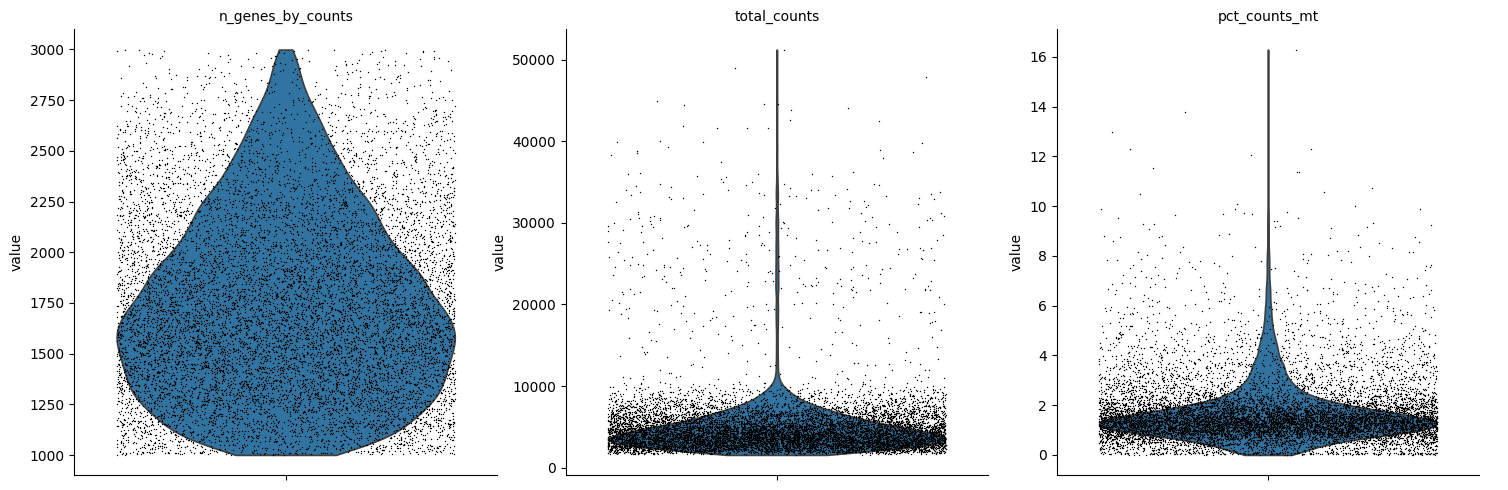

In [37]:
sc.pl.violin(
    adata_ep,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [38]:
sc.pp.filter_cells(adata_ep, min_genes=100)
sc.pp.filter_genes(adata_ep, min_cells=3)

In [39]:
adata_ep = adata_ep[adata_ep.obs["pct_counts_mt"] <= 10].copy()

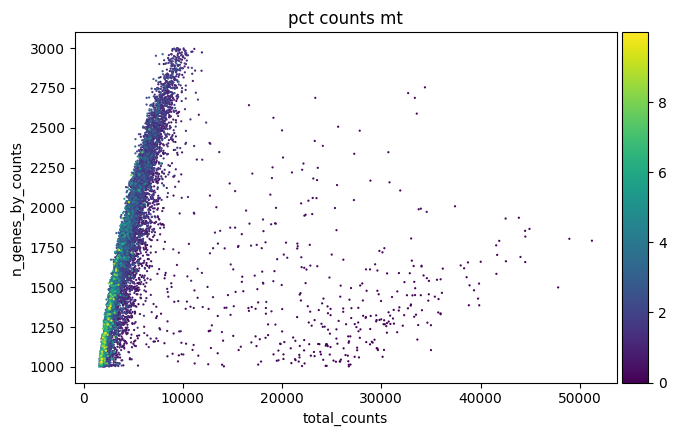

In [40]:
sc.pl.scatter(adata_ep, "total_counts", "n_genes_by_counts", color="pct_counts_mt")


# add meta

In [41]:
meta_ep = pd.read_csv("data/atlas_metadata.txt", sep="\t", index_col=0)
meta_ep

FileNotFoundError: [Errno 2] No such file or directory: 'data/atlas_metadata.txt'

In [ ]:
meta_ep = meta_ep[meta_ep.index.isin(adata_ep.obs.index)]

In [ ]:
adata_ep.obs['cell_type'] = meta_ep['Cluster']
adata_ep.obs['Mouse_ID'] = meta_ep['Mouse']

# [Filter doublet](https://github.com/swolock/scrublet/blob/master/examples/scrublet_basics.ipynb)

In [ ]:
import scrublet as scr

In [ ]:
sc.pp.scrublet(adata_ep, batch_key="Mouse_ID")
adata_ep[adata_ep.obs['predicted_doublet']==True]

View of AnnData object with n_obs × n_vars = 0 × 15221
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'cell_type', 'Mouse_ID', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'

In [ ]:
# scrub = scr.Scrublet(adata_ep, expected_doublet_rate=0.06)
# doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
#                                                           min_cells=3, 
#                                                           min_gene_variability_pctl=85, 
#                                                           n_prin_comps=30)

# scrub.plot_histogram();

# save raw counts

In [ ]:
# Saving count data
adata_ep.layers["counts"] = adata_ep.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata_ep)
# Logarithmize the data
sc.pp.log1p(adata_ep)

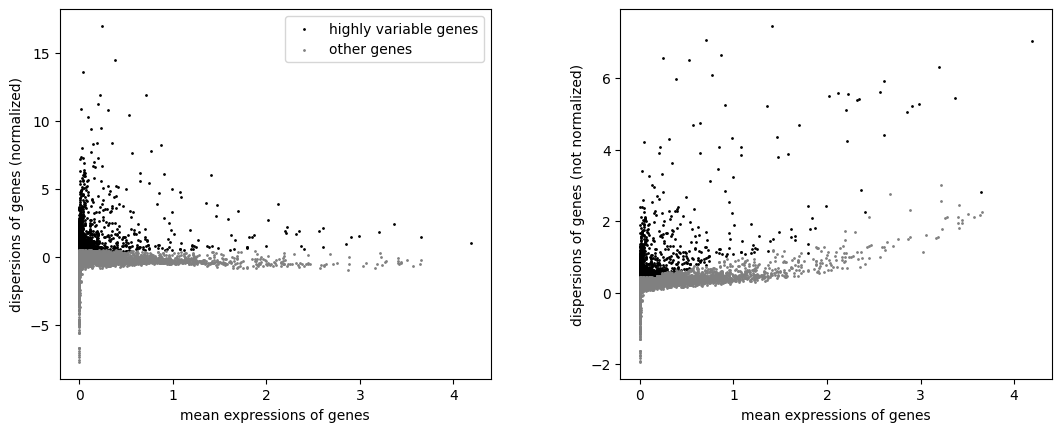

In [ ]:
sc.pp.highly_variable_genes(adata_ep, n_top_genes=2000, batch_key="Mouse_ID")

sc.pl.highly_variable_genes(adata_ep)

# dim red

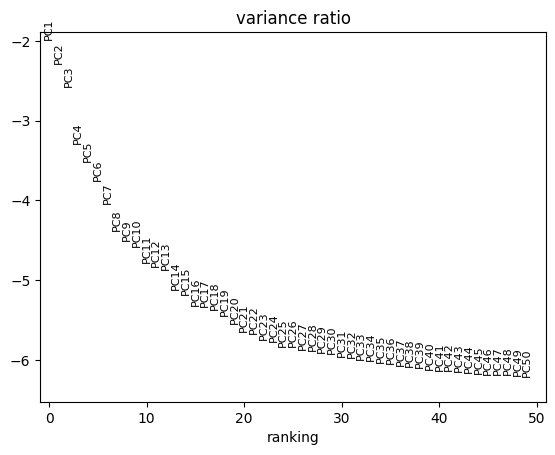

In [ ]:
sc.tl.pca(adata_ep)
sc.pl.pca_variance_ratio(adata_ep, n_pcs=50, log=True)

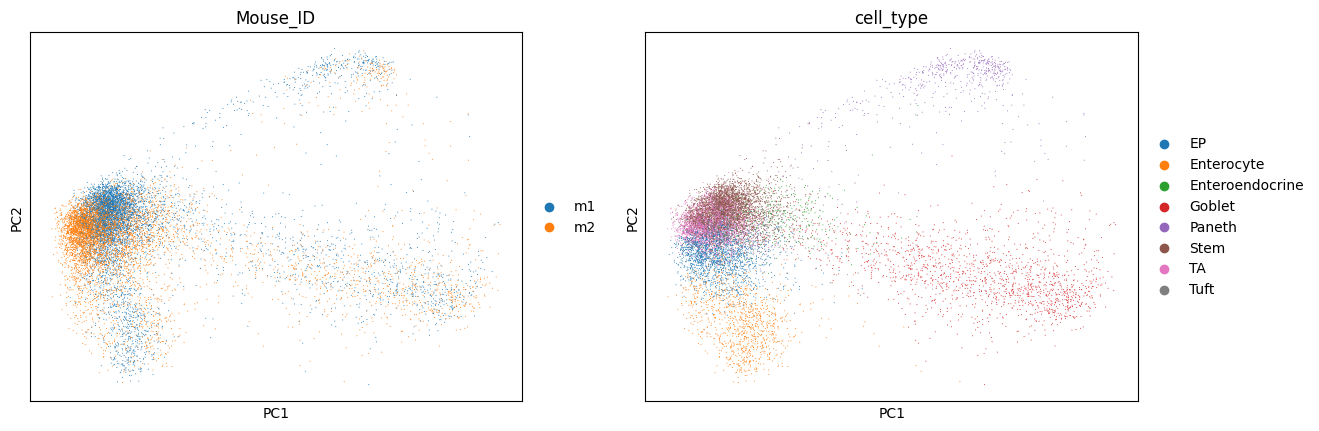

In [ ]:
sc.pl.pca(
    adata_ep,
    color=["Mouse_ID", "cell_type"],
    ncols=2,
    size=2,
)

Nearest neighbor graph construction and visualization#



/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


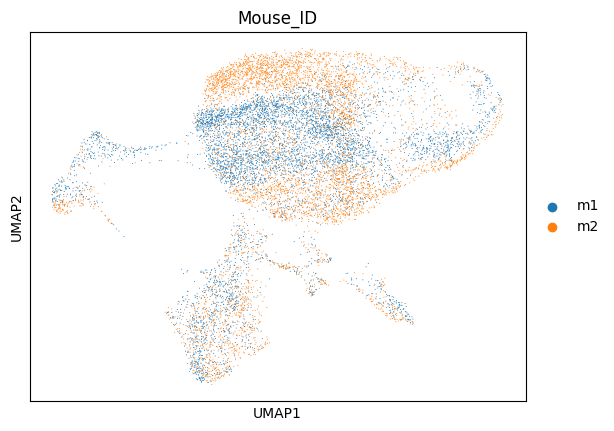

In [ ]:
sc.pp.neighbors(adata_ep)
sc.tl.umap(adata_ep)

sc.pl.umap(
    adata_ep,
    color="Mouse_ID",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

# Preprocess neuron cells

In [ ]:
meta = pd.read_csv("data/all.meta.txt", sep='\t')
# meta[meta['Dataset'] == "Mouse ileum enteric neurons (10X)"]

cols = ["Annotation", "Mouse_ID", "Unique_ID"]

# make meta one-row-per NAME and index it by NAME
meta2 = (meta.assign(NAME=meta["NAME"].astype(str).str.strip())
            .drop_duplicates("NAME", keep="first")
            .set_index("NAME"))

# align rows to obs and assign
aligned = meta2.reindex(gc_neur.obs_names)[cols]
for c in cols:
    gc_neur.obs[c] = aligned[c]   # overwrites if column already exists

gc_neur.obs[cols].isna().sum()    # sanity check

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_69473/1848978344.py:1: DtypeWarning: Columns (1,4,5,7,9,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("data/all.meta.txt", sep='\t')


Annotation    0
Mouse_ID      0
Unique_ID     0
dtype: int64

In [ ]:
gc_neur.var_names_make_unique()
gc_neur.var.index.str.startswith("mt-").sum()
gc_neur.var["mt"] = gc_neur.var_names.str.upper().str.startswith("MT-")
gc_neur.var["mt"].value_counts()


mt
False    13849
True        13
Name: count, dtype: int64

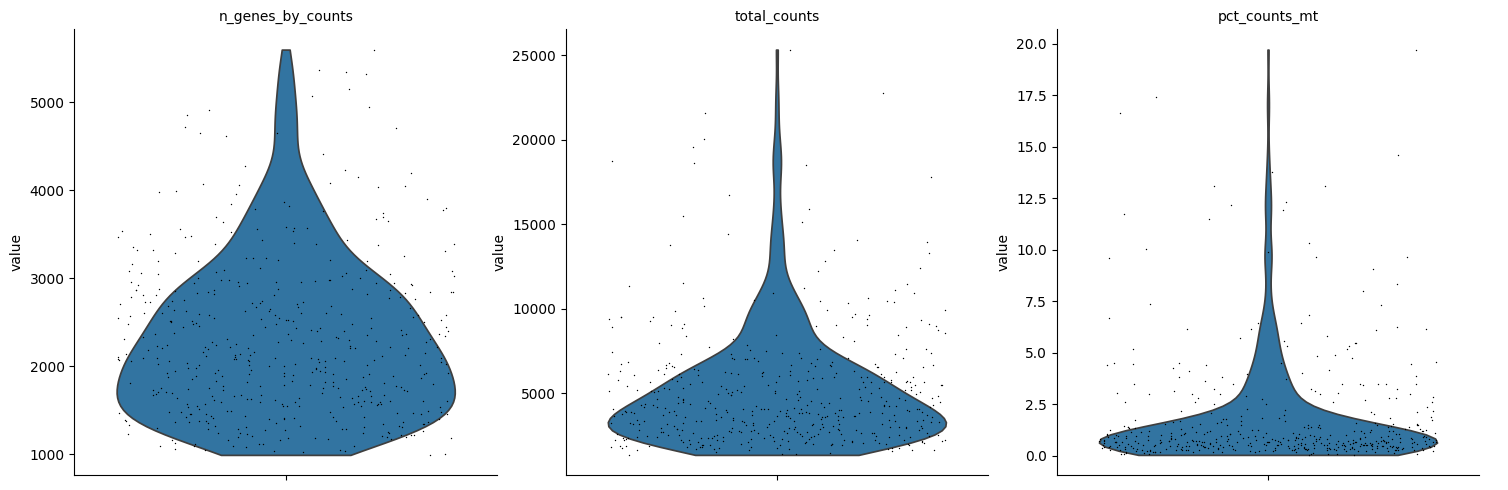

In [ ]:

# ribosomal genes
gc_neur.var["ribo"] = gc_neur.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
gc_neur.var["hb"] = gc_neur.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    gc_neur, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)


sc.pl.violin(
    gc_neur,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)


### filter mt counts > 10%

In [ ]:
gc_neur = gc_neur[gc_neur.obs["pct_counts_mt"] <= 10].copy()

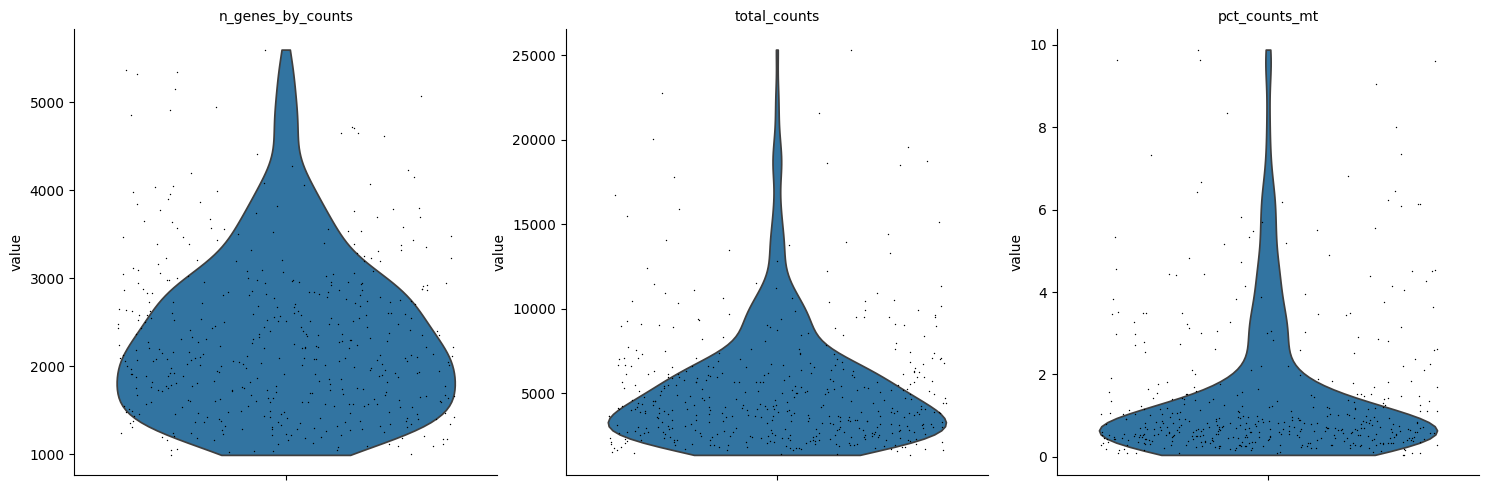

In [ ]:

sc.pl.violin(
    gc_neur,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

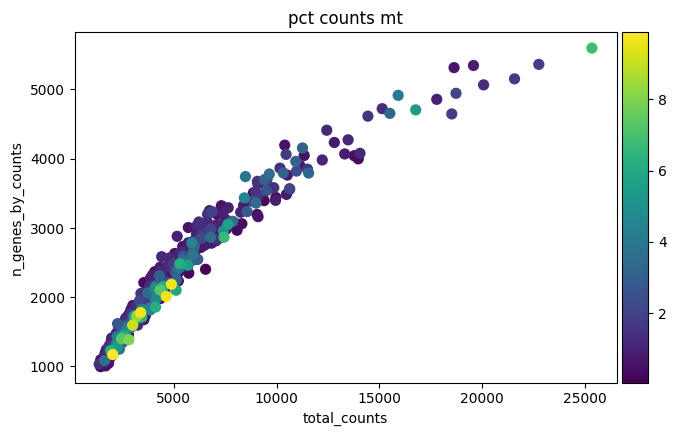

In [ ]:

sc.pp.filter_cells(gc_neur, min_genes=100)
sc.pp.filter_genes(gc_neur, min_cells=3)
sc.pl.scatter(gc_neur, "total_counts", "n_genes_by_counts", color="pct_counts_mt")


In [ ]:
sc.pp.scrublet(gc_neur, batch_key="Mouse_ID")

In [ ]:
gc_neur[gc_neur.obs['predicted_doublet']==True]


View of AnnData object with n_obs × n_vars = 16 × 13862
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'

In [ ]:
gc_neur= gc_neur[~gc_neur.obs['predicted_doublet']]

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_69473/1010880351.py:2: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  gc_neur.layers["counts"] = gc_neur.X.copy()


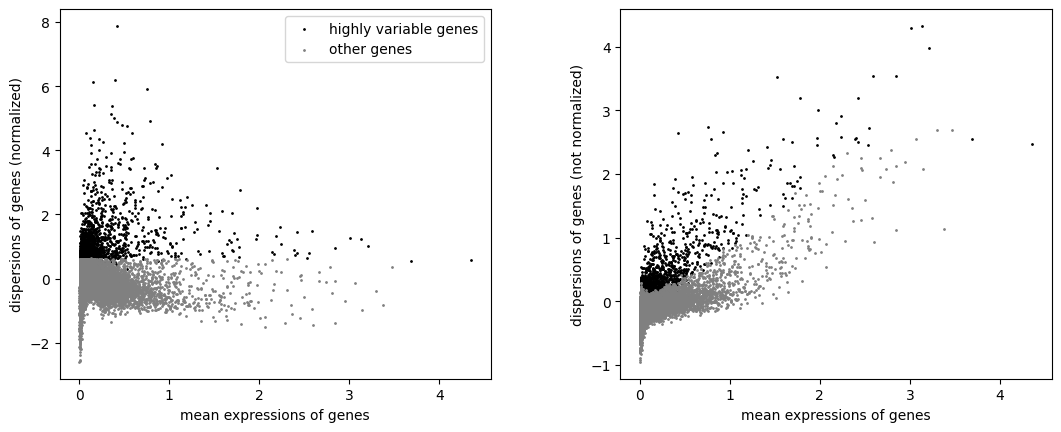

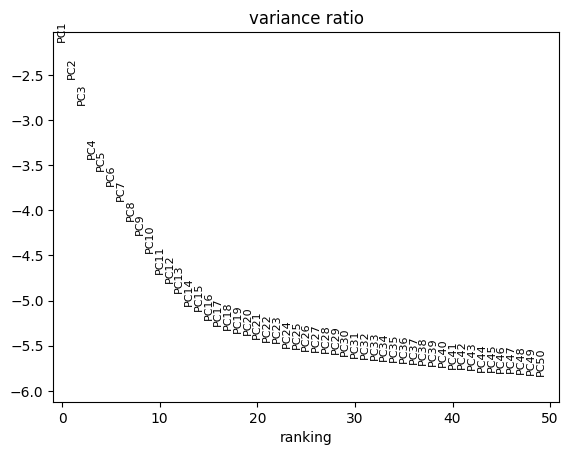

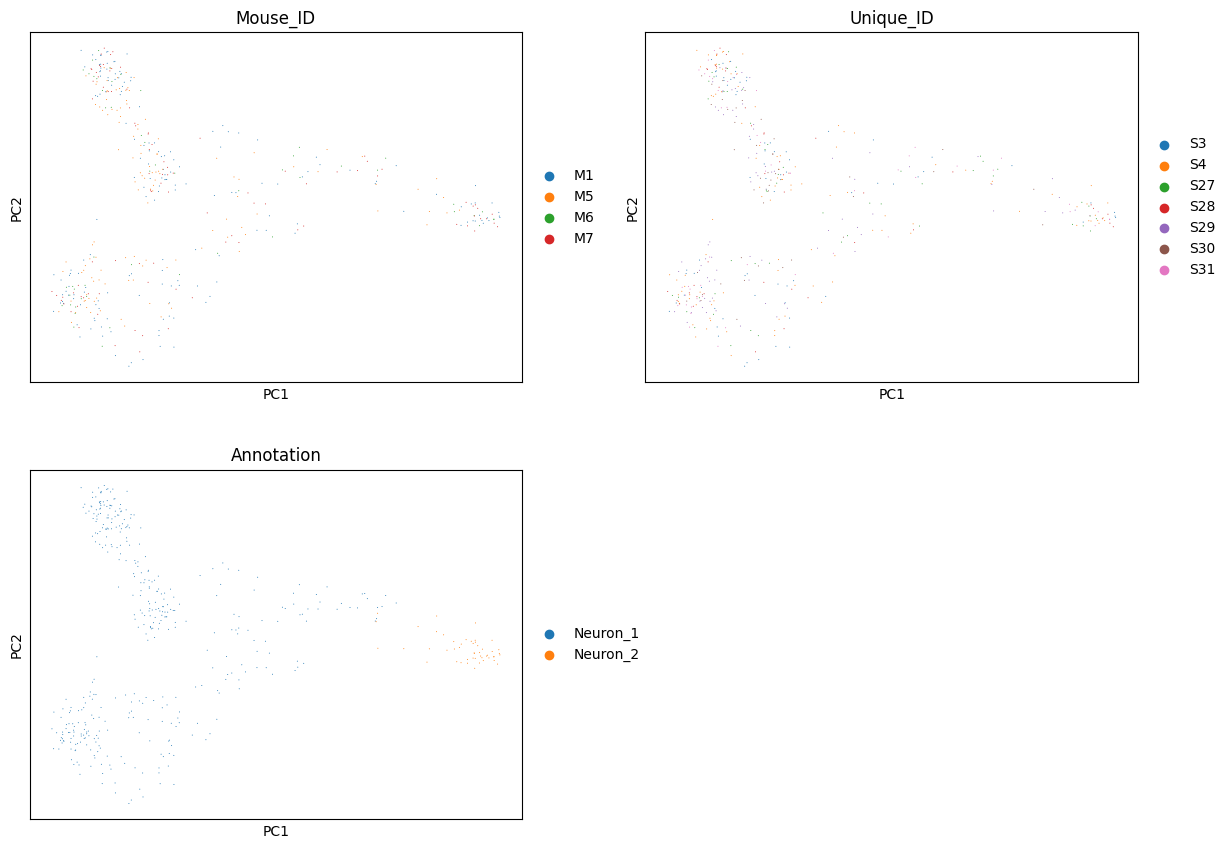

In [ ]:
# Saving count data
gc_neur.layers["counts"] = gc_neur.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(gc_neur)
# Logarithmize the data
sc.pp.log1p(gc_neur)

sc.pp.highly_variable_genes(gc_neur, n_top_genes=2000, batch_key="Mouse_ID")

sc.pl.highly_variable_genes(gc_neur)


sc.tl.pca(gc_neur)

sc.pl.pca_variance_ratio(gc_neur, n_pcs=50, log=True)



sc.pl.pca(
    gc_neur,
    color=["Mouse_ID", "Unique_ID", "Annotation"],
    ncols=2,
    size=2,
)


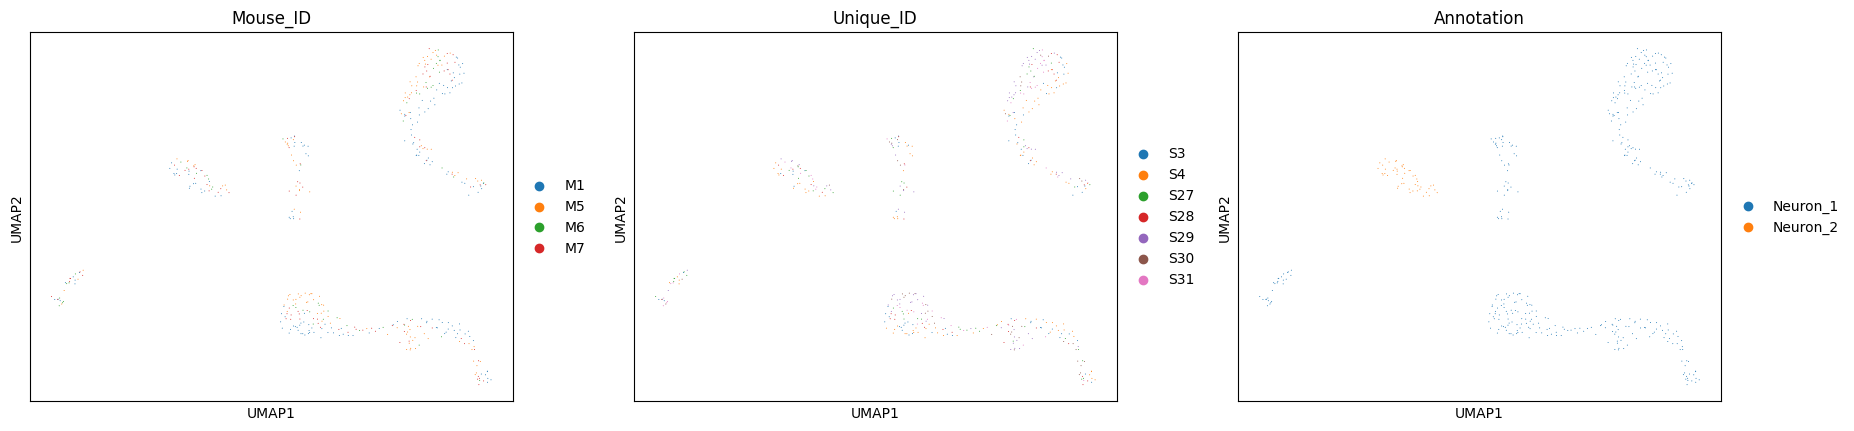

In [ ]:
sc.pp.neighbors(gc_neur)
sc.tl.umap(gc_neur)

sc.pl.umap(
    gc_neur,
    color=["Mouse_ID", "Unique_ID", "Annotation"],
    # Setting a smaller point size to get prevent overlap
    size=2,
)

# pick genes that interscect 

In [ ]:
genes = gc_neur.var_names.intersection(adata_ep.var_names)
gc_neur = gc_neur[:, genes].copy()
adata_ep = adata_ep[:, genes].copy()

In [ ]:
adata = gc_neur.concatenate(adata_ep, batch_key="dataset", batch_categories=["gc_neur","adata_ep"])

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_69473/1819251970.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = gc_neur.concatenate(adata_ep, batch_key="dataset", batch_categories=["gc_neur","adata_ep"])


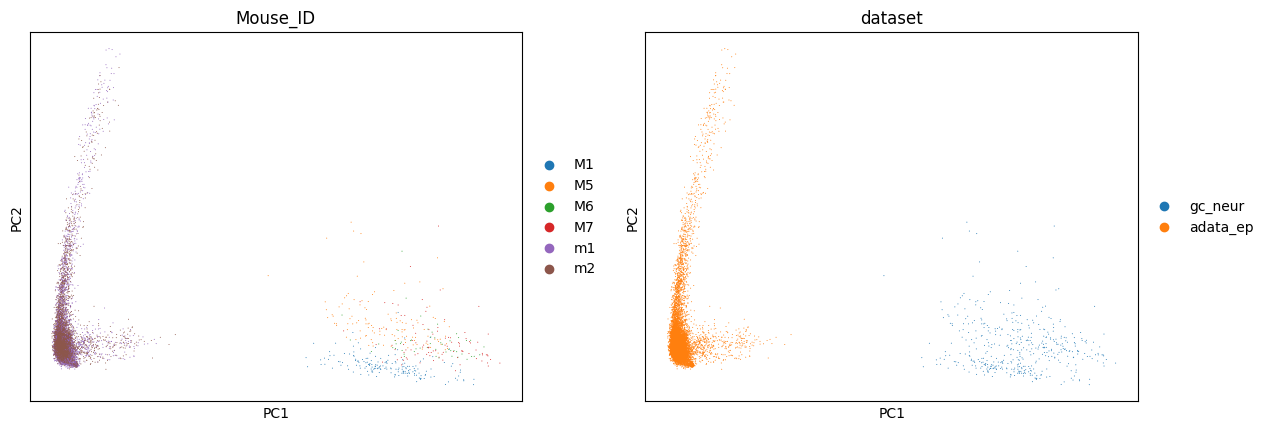

In [ ]:
sc.pp.highly_variable_genes(adata, batch_key="Mouse_ID")

# scale combined object 

sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver="arpack")

sc.pl.pca(
    adata,
    color=["Mouse_ID",  "dataset"],
    ncols=2,
    size=2,
)
# Harmony-corrected PCs are in `adata.obsm["X_pca_harmony"]`

In [ ]:
# copy initial pca for comparison

adata.obsm['X_pca_initial'] = adata.obsm['X_pca'].copy()

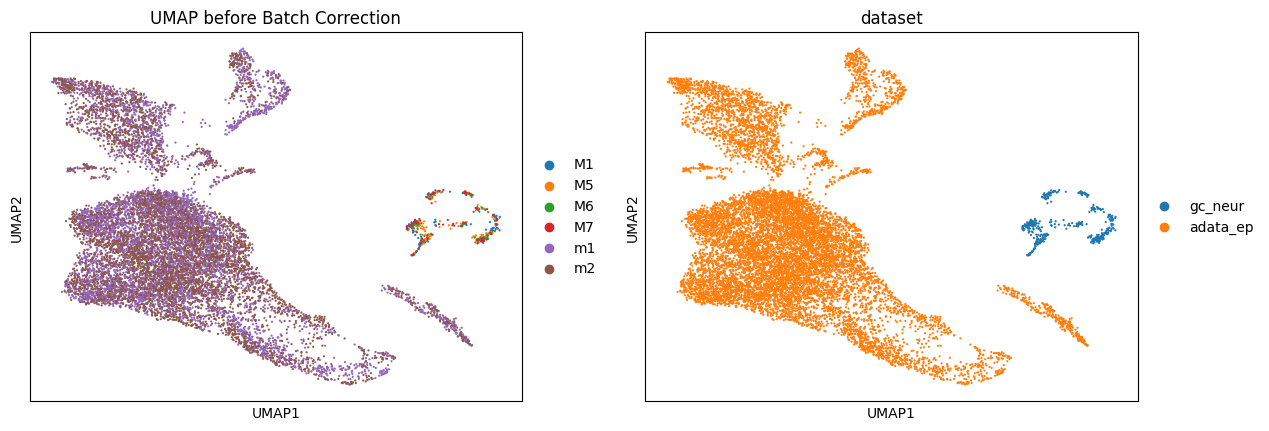

In [ ]:
adata.obsm['X_pca_initial'] = adata.obsm['X_pca'].copy()sc.pp.neighbors(adata, n_pcs=50, use_rep='X_pca_initial')

sc.tl.umap(adata)
sc.pl.umap(adata, color=["Mouse_ID", "dataset"], title="UMAP before Batch Correction")

adata.obsm['X_umap_preharmony'] = adata.obsm['X_umap'].copy()


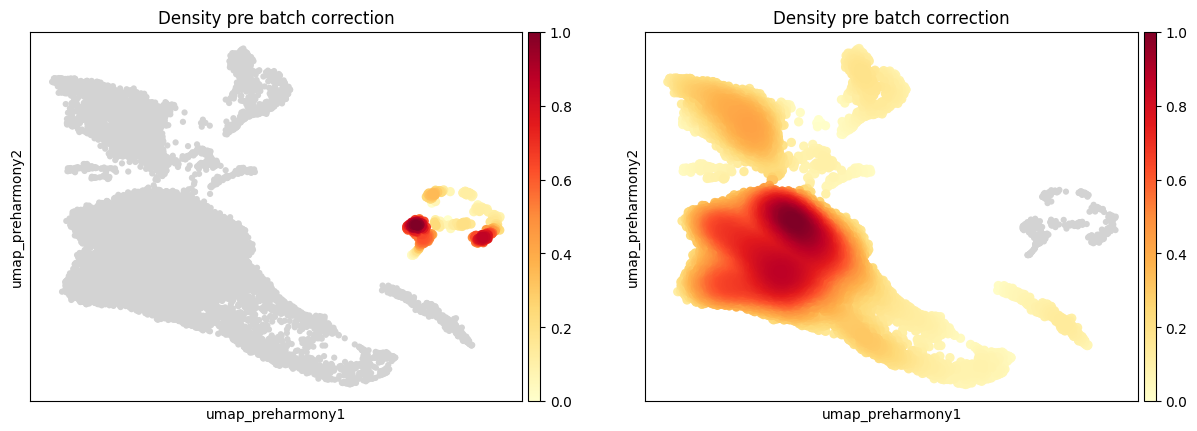

In [ ]:
sc.tl.embedding_density(adata,
                        basis='umap_preharmony',
                        groupby='dataset', 
                        key_added='density_X_umap_harmony_sample')


sc.pl.embedding_density(adata,
                        basis='umap_preharmony',
                        key='density_X_umap_harmony_sample',
                        title="Density pre batch correction") 

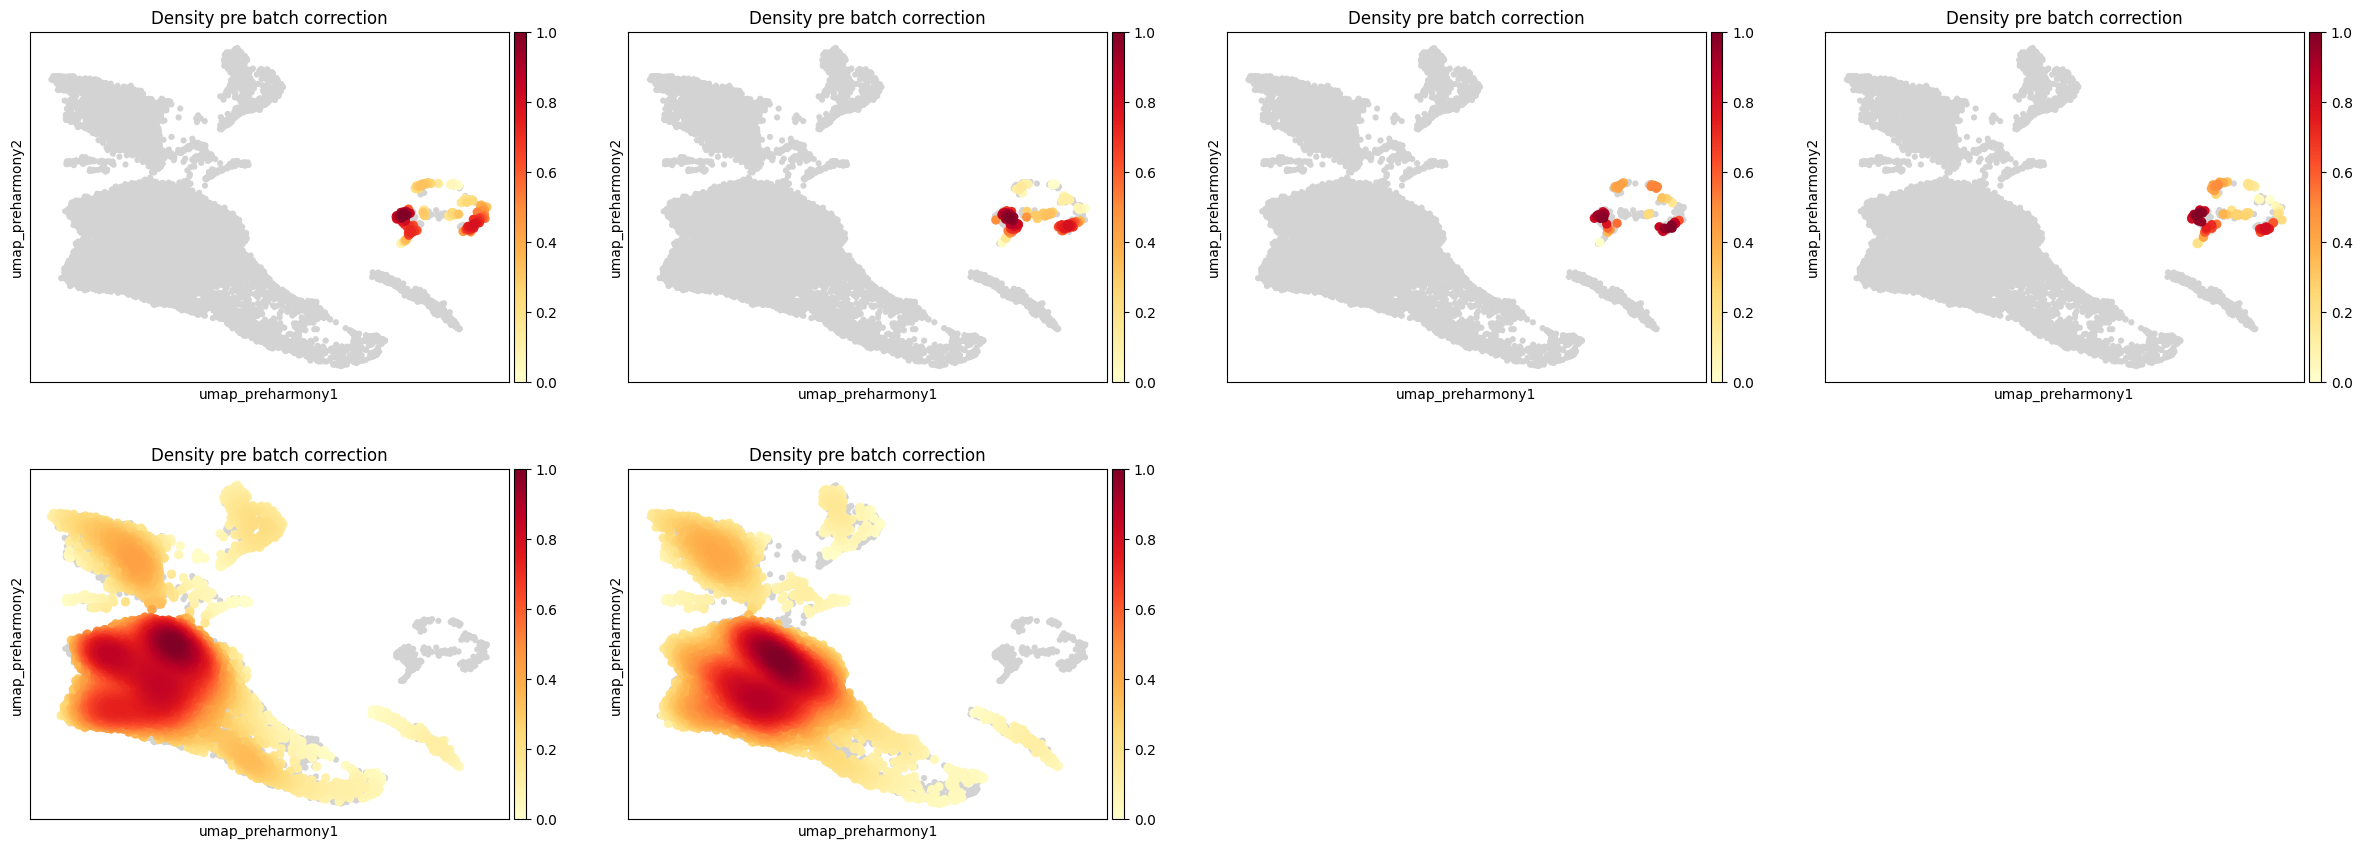

In [ ]:
sc.tl.embedding_density(adata,
                        basis='umap_preharmony',
                        groupby='Mouse_ID', 
                        key_added='density_X_umap_harmony_sample')


sc.pl.embedding_density(adata,
                        basis='umap_preharmony',
                        key='density_X_umap_harmony_sample',
                        title="Density pre batch correction") 

In [ ]:
adata_cp = adata.copy()

In [ ]:
adata[adata.obs['dataset']=='gc_neur']

View of AnnData object with n_obs × n_vars = 443 × 12030
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'dataset'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts-adata_ep', 'mean_counts-adata_ep', 'log1p_mean_counts-adata_ep', 'pct_dropout_by_counts-adata_ep', 'total_counts-adata_ep', 'log1p_total_counts-adata_ep', 'n_cells-adata_ep', 'highly_variable-adata_ep', 'means-adata_ep', 'dispersions-adata_ep', 'dispersions_norm-adata_ep', 'highly_variable_nbatches-adata_ep', 'highly_variable_intersection-adata_ep', 'n_cells_by_counts-gc_neur', 'mean_counts-gc_neur', 'log1p_mean_counts-gc_neur', 'pct_dropout_by_counts-gc_neur', 'tot

In [ ]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata, ['Mouse_ID', 'dataset'])

2025-09-26 00:44:18,737 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2025-09-26 00:44:19,729 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-09-26 00:44:19,755 - harmonypy - INFO - Iteration 1 of 10
2025-09-26 00:44:20,733 - harmonypy - INFO - Iteration 2 of 10
2025-09-26 00:44:21,640 - harmonypy - INFO - Iteration 3 of 10
2025-09-26 00:44:22,540 - harmonypy - INFO - Iteration 4 of 10
2025-09-26 00:44:23,174 - harmonypy - INFO - Iteration 5 of 10
2025-09-26 00:44:24,063 - harmonypy - INFO - Iteration 6 of 10
2025-09-26 00:44:24,416 - harmonypy - INFO - Iteration 7 of 10
2025-09-26 00:44:24,724 - harmonypy - INFO - Iteration 8 of 10
2025-09-26 00:44:25,041 - harmonypy - INFO - Iteration 9 of 10
2025-09-26 00:44:25,355 - harmonypy - INFO - Iteration 10 of 10
2025-09-26 00:44:25,863 - harmonypy - INFO - Stopped before convergence


In [ ]:
adata

AnnData object with n_obs × n_vars = 12124 × 13862
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'batch', 'dataset'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts-adata_ep', 'mean_counts-adata_ep', 'log1p_mean_counts-adata_ep', 'pct_dropout_by_counts-adata_ep', 'total_counts-adata_ep', 'log1p_total_counts-adata_ep', 'highly_variable-adata_ep', 'means-adata_ep', 'dispersions-adata_ep', 'dispersions_norm-adata_ep', 'highly_variable_nbatches-adata_ep', 'highly_variable_intersection-adata_ep', 'n_cells_by_counts-gc_neur', 'mean_counts-gc_neur', 'log1p_mean_counts-gc_neur', 'pct_dropout_by_counts-gc_neur', 'total_counts-gc_neur

In [ ]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony', key_added='neighbors_harmony', n_pcs=40, random_state=42)
sc.tl.umap(adata, neighbors_key='neighbors_harmony', random_state=42)
adata.obsm['X_umap_harmony']  = adata.obsm['X_umap'].copy()

/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# BC version 2: to not over correct

In [ ]:
sc.pp.combat(gc_neur, key="Mouse_ID")
sc.pp.combat(adata_ep, key="Mouse_ID")  # batch here is per-m

/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/Users/sofialuk/Desktop/hack_team_7/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [ ]:
adata_corr = gc_neur.concatenate(adata_ep, join="inner", batch_key="dataset", batch_categories=["gc_neur","adata_ep"])

/var/folders/l_/4y7k2l0d579628286_0qftx00000gn/T/ipykernel_69473/408129692.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_corr = gc_neur.concatenate(adata_ep, join="inner", batch_key="dataset", batch_categories=["gc_neur","adata_ep"])


In [ ]:
adata_corr

AnnData object with n_obs × n_vars = 12095 × 12030
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'dataset'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts-adata_ep', 'mean_counts-adata_ep', 'log1p_mean_counts-adata_ep', 'pct_dropout_by_counts-adata_ep', 'total_counts-adata_ep', 'log1p_total_counts-adata_ep', 'n_cells-adata_ep', 'highly_variable-adata_ep', 'means-adata_ep', 'dispersions-adata_ep', 'dispersions_norm-adata_ep', 'highly_variable_nbatches-adata_ep', 'highly_variable_intersection-adata_ep', 'n_cells_by_counts-gc_neur', 'mean_counts-gc_neur', 'log1p_mean_counts-gc_neur', 'pct_dropout_by_counts-gc_neur', 'total_cou

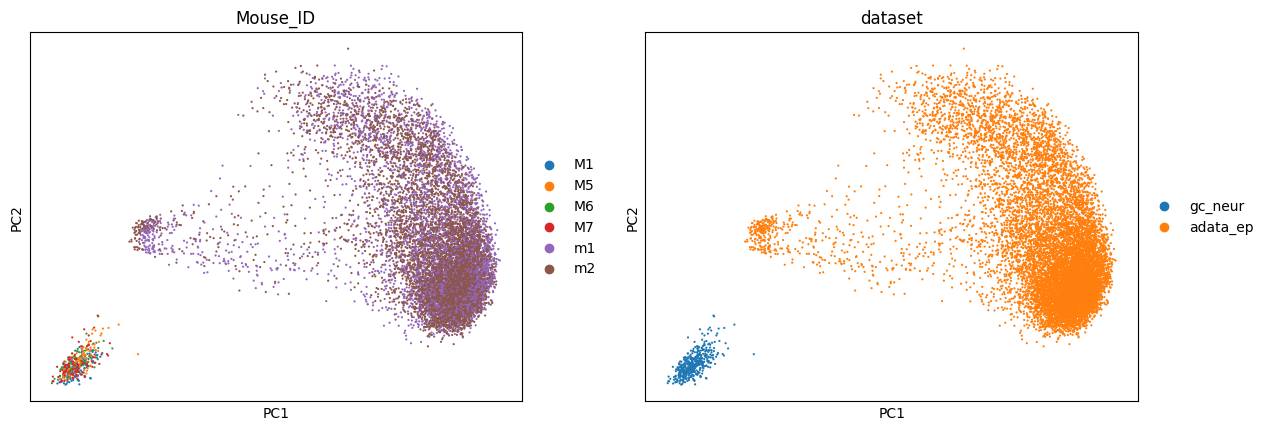

In [ ]:
sc.pp.pca(adata_corr)

sc.pl.pca(
    adata_corr,
    color=["Mouse_ID",  "dataset"])

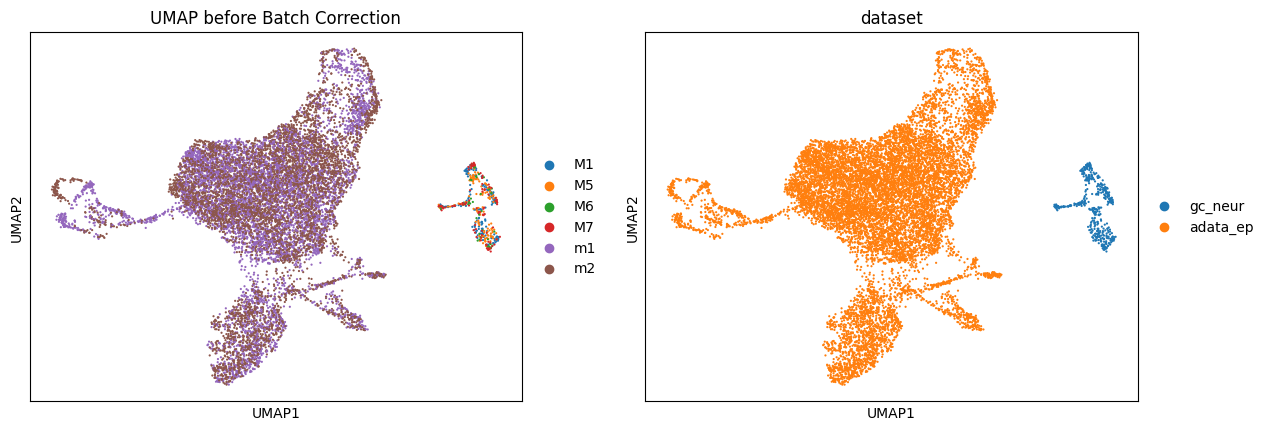

In [ ]:
adata_corr.obsm['X_pca_initial'] = adata_corr.obsm['X_pca'].copy()
sc.pp.neighbors(adata_corr, n_pcs=50, use_rep='X_pca_initial')


sc.tl.umap(adata_corr)
sc.pl.umap(adata_corr, color=["Mouse_ID", "dataset"], title="UMAP before Batch Correction")

adata_corr.obsm['X_umap_preharmony'] = adata_corr.obsm['X_umap'].copy()


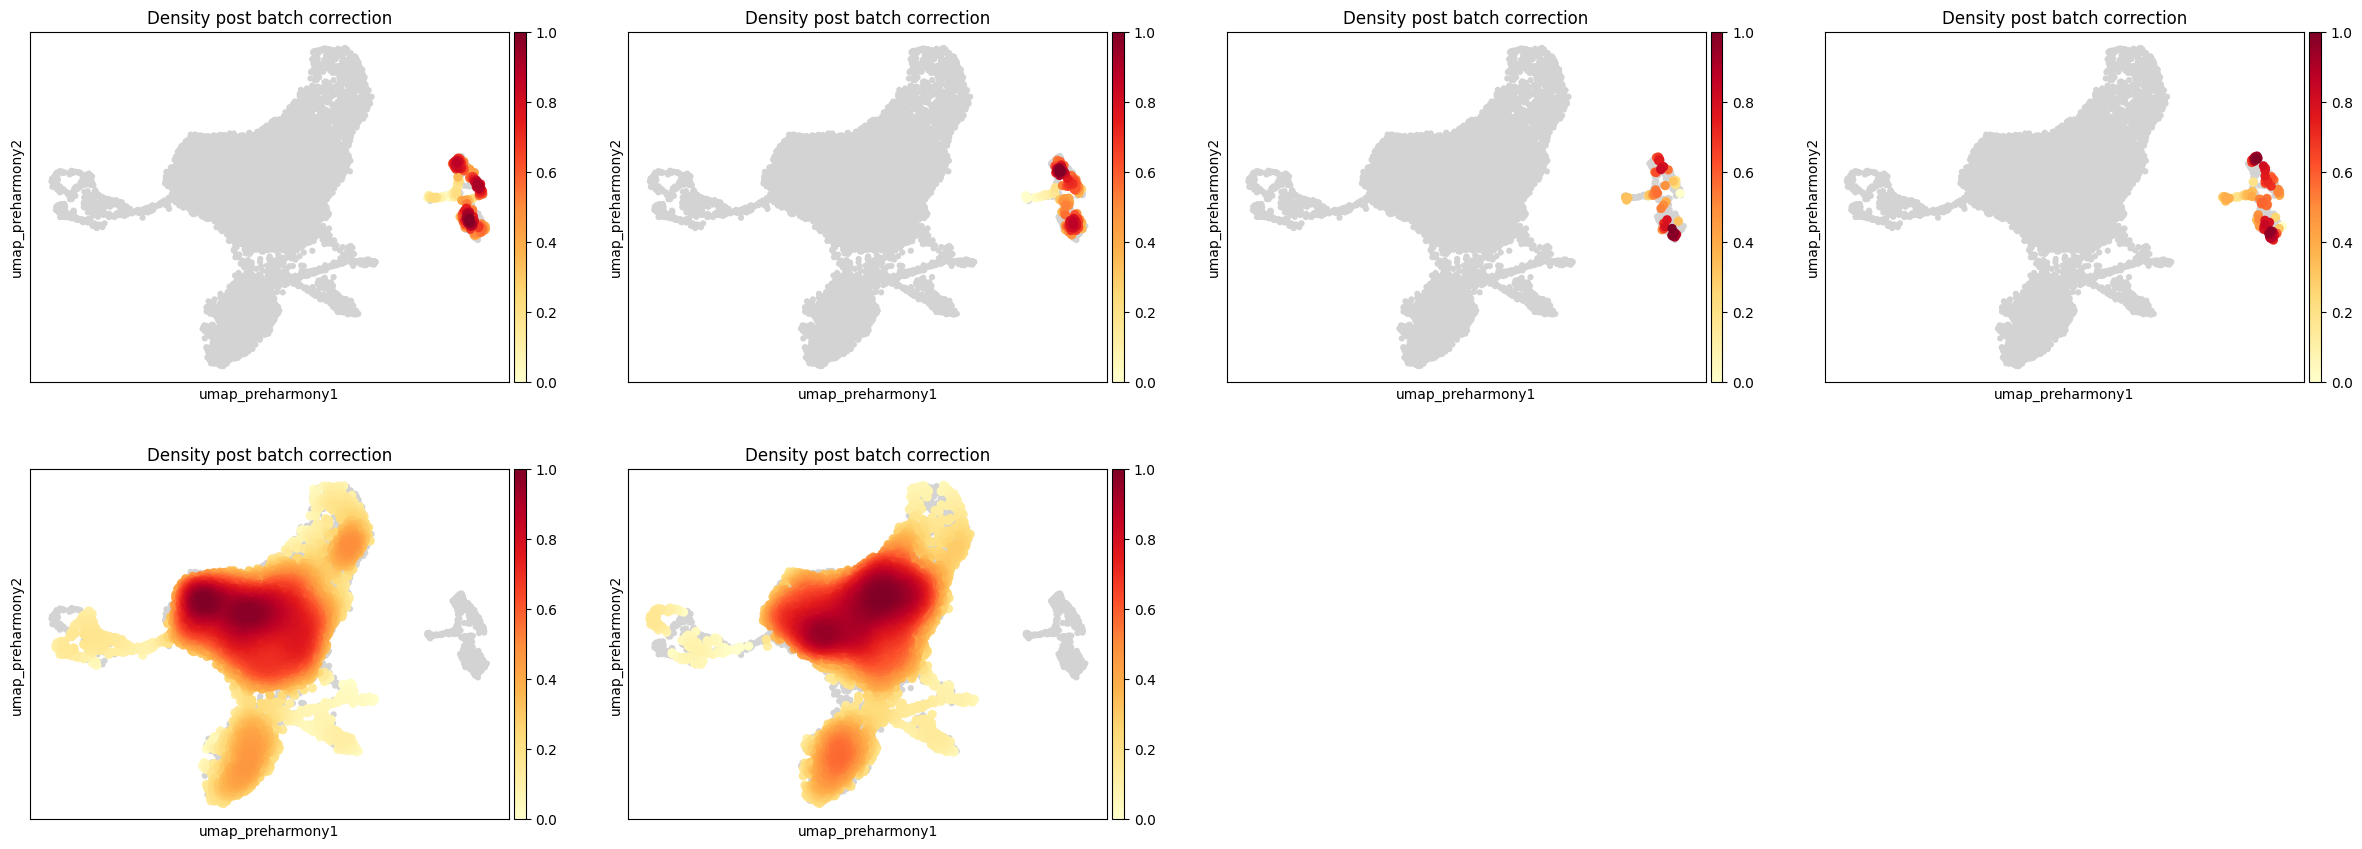

In [ ]:
sc.tl.embedding_density(adata_corr,
                        basis='umap_preharmony',
                        groupby='Mouse_ID', 
                        key_added='density_X_umap_harmony_sample')


sc.pl.embedding_density(adata_corr,
                        basis='umap_preharmony',
                        key='density_X_umap_harmony_sample',
                        title="Density post batch correction") 

In [ ]:
adata_corr.write("data/processed/batch_corrected_df.h5ad")

In [ ]:
adata = adata_corr.copy()

In [ ]:
adata.obs['Annotation'].value_counts()

Annotation
Neuron_1    394
Neuron_2     49
Name: count, dtype: int64

In [ ]:
adata.obs['cell_type'].value_counts()

cell_type
Stem               3678
TA                 2305
EP                 1955
Goblet             1559
Enterocyte         1038
Paneth              529
Enteroendocrine     323
Tuft                265
Name: count, dtype: int64